<a href="https://colab.research.google.com/github/Bone-Age-Maisha/Bone_imp_1/blob/main/IMG_GEN_final_for__atlas_all_combiniation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [2]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 124018 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [3]:
import numpy as np
import cv2
import os
import pandas as pd


In [4]:
import pandas as pd
train_dir = '/content/drive/MyDrive/hand_atlas/image'
df = pd.read_csv('/content/drive/MyDrive/hand_atlas/data.csv')

In [5]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)

In [6]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir, 
                                                         '{}.jpg'.format(x)))
age_df['exists'] = age_df['path'].map(os.path.exists)

In [7]:
age1=age_df

In [8]:
ag=age1.boneage.unique()
ag.shape

(1048,)

In [9]:
age1.drop(df[(age1['gender'] == 0)].index, inplace=True)

In [10]:
age1

,Unnamed: 0,id,boneage,gender,path,exists
0,0,5014,216.30,1,/content/drive/MyDrive/hand_atlas/image/5014.jpg,True
1,1,5059,221.10,1,/content/drive/MyDrive/hand_atlas/image/5059.jpg,True
2,2,5300,226.40,1,/content/drive/MyDrive/hand_atlas/image/5300.jpg,True
3,3,5084,227.70,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg,True
4,4,5342,224.40,1,/content/drive/MyDrive/hand_atlas/image/5342.jpg,True
...,...,...,...,...,...,...
859,859,3134,55.27,1,/content/drive/MyDrive/hand_atlas/image/3134.jpg,True
860,860,4486,48.85,1,/content/drive/MyDrive/hand_atlas/image/4486.jpg,True
861,861,3736,47.90,1,/content/drive/MyDrive/hand_atlas/image/3736.jpg,True
862,862,3734,59.18,1,/content/drive/MyDrive/hand_atlas/image/3734.jpg,True


In [11]:
ag=age1.boneage.unique()
ag.shape

(600,)

In [12]:
train1_df = age1.groupby(['boneage']).apply(lambda x: x.sample(5, replace = True)
                                                      ).reset_index(drop = True)

In [13]:
train1_df

,Unnamed: 0,id,boneage,gender,path,exists
0,504,5574,0.3616,1,/content/drive/MyDrive/hand_atlas/image/5574.jpg,True
1,504,5574,0.3616,1,/content/drive/MyDrive/hand_atlas/image/5574.jpg,True
2,504,5574,0.3616,1,/content/drive/MyDrive/hand_atlas/image/5574.jpg,True
3,504,5574,0.3616,1,/content/drive/MyDrive/hand_atlas/image/5574.jpg,True
4,504,5574,0.3616,1,/content/drive/MyDrive/hand_atlas/image/5574.jpg,True
...,...,...,...,...,...,...
2995,3,5084,227.7000,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg,True
2996,3,5084,227.7000,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg,True
2997,3,5084,227.7000,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg,True
2998,3,5084,227.7000,1,/content/drive/MyDrive/hand_atlas/image/5084.jpg,True


In [14]:
from sklearn.model_selection import train_test_split
train_test1, valid1 = train_test_split(train1_df, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = train1_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train1, test1 = train_test_split(train_test1, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test1['boneage'])
print('train', train1.shape[0], 'validation', valid1.shape[0],test1.shape[0])

train 1680 validation 600 720


In [15]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300,300)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [16]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [17]:
train1_gen = flow_from_dataframe( core_idg, train1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1680)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1680 images


In [18]:
valid1_gen = flow_from_dataframe(core_idg, valid1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 600) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 600 images


In [19]:

testcore_idg = ImageDataGenerator()

In [20]:
test1_gen = flow_from_dataframe(testcore_idg, 
                              test1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 720)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 720 images


In [21]:
train1_X, train1_Y = next(train1_gen)

In [22]:
train1_X.shape

(1680, 300, 300, 3)

In [23]:
valid1_X, valid1_Y = next(valid1_gen)

In [24]:
valid1_X.shape

(600, 300, 300, 3)

In [25]:
test1_X, test1_Y = next(test1_gen)

In [26]:
test1_X.shape

(720, 300, 300, 3)

In [27]:
import pandas as pd
train_dir = '/content/drive/MyDrive/hand_atlas/image'
df = pd.read_csv('/content/drive/MyDrive/hand_atlas/data.csv')

In [28]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)

In [29]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,
                                                         '{}.jpg'.format(x)))
age_df['exists'] = age_df['path'].map(os.path.exists)

In [30]:
age0=age_df

In [31]:
age0.drop(df[(age0['gender'] == 1)].index, inplace=True)

In [32]:
age0

,Unnamed: 0,id,boneage,gender,path,exists
515,515,4117,186.20,0,/content/drive/MyDrive/hand_atlas/image/4117.jpg,True
516,516,4389,186.40,0,/content/drive/MyDrive/hand_atlas/image/4389.jpg,True
517,517,4113,182.50,0,/content/drive/MyDrive/hand_atlas/image/4113.jpg,True
518,518,4503,188.10,0,/content/drive/MyDrive/hand_atlas/image/4503.jpg,True
519,519,4114,180.50,0,/content/drive/MyDrive/hand_atlas/image/4114.jpg,True
...,...,...,...,...,...,...
1382,1382,6106,32.52,0,/content/drive/MyDrive/hand_atlas/image/6106.jpg,True
1383,1383,5234,30.02,0,/content/drive/MyDrive/hand_atlas/image/5234.jpg,True
1384,1384,5334,33.70,0,/content/drive/MyDrive/hand_atlas/image/5334.jpg,True
1385,1385,6131,24.13,0,/content/drive/MyDrive/hand_atlas/image/6131.jpg,True


In [33]:
ag=age0.boneage.unique()
ag.shape

(599,)

In [34]:
train0_df = age0.groupby(['boneage']).apply(lambda x: x.sample(5, replace = True)
                                                      ).reset_index(drop = True)

In [35]:
train0_df

,Unnamed: 0,id,boneage,gender,path,exists
0,1036,4706,2.038,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg,True
1,1036,4706,2.038,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg,True
2,1036,4706,2.038,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg,True
3,1036,4706,2.038,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg,True
4,1036,4706,2.038,0,/content/drive/MyDrive/hand_atlas/image/4706.jpg,True
...,...,...,...,...,...,...
2990,1225,5198,228.100,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg,True
2991,1225,5198,228.100,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg,True
2992,1225,5198,228.100,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg,True
2993,1225,5198,228.100,0,/content/drive/MyDrive/hand_atlas/image/5198.jpg,True


In [36]:
from sklearn.model_selection import train_test_split
train_test0, valid0 = train_test_split(train0_df, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = train0_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train0, test0 = train_test_split(train_test0, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test0['boneage'])
print('train', train0.shape[0], 'validation', valid0.shape[0],test0.shape[0])

train 1677 validation 599 719


In [37]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300,300)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [38]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [39]:
train0_gen = flow_from_dataframe( core_idg, train0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1677)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1677 images


In [40]:
valid0_gen = flow_from_dataframe(core_idg, valid0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 599) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 599 images


In [44]:

testcore_idg = ImageDataGenerator()

In [42]:
test0_gen = flow_from_dataframe(testcore_idg, 
                              test0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 719)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 719 images


In [43]:
train0_X, train0_Y = next(train0_gen)

In [45]:
train0_X.shape

(1677, 300, 300, 3)

In [46]:
valid0_X, valid0_Y = next(valid0_gen)

In [ ]:
valid0_X.shape

In [47]:
test0_X, test0_Y = next(test0_gen)

In [ ]:
test0_X.shape

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
points = df.boneage.unique()

In [ ]:
import numpy as np
point=[]
for i in range (160):
  if((df['boneage'].value_counts()[points[i]])<3):
    point.append(points[i])
  #print(df['boneage'].value_counts()[points[i]])
point=np.asarray(point)

In [ ]:
for i in range(64):
  x=df.id[df.boneage == point[i]].tolist()[0]
  y=df.boneage[df.boneage == point[i]].tolist()[0]
  m=df.male[df.boneage == point[i]].tolist()[0]
  z=df.path[df.boneage== point[i]].tolist()[0]
  #y=df['boneage']
  #m=df['male']
  new_row = {'id': x, 'boneage':y, 'male':m , 'path':z}
  age_df = age_df.append(new_row, ignore_index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc79cc4f0>]],
      dtype=object)

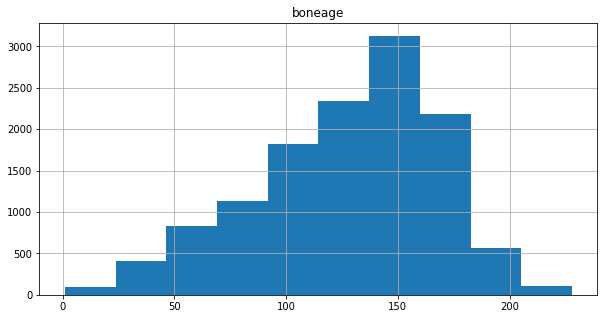

In [ ]:
df[['boneage', 'male']].hist(figsize = (10, 5))
#df['boneage'] = pd.cut(df['boneage'], 10)

In [ ]:
age_df

,id,boneage,male,path,exists
0,1377,180,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
1,1378,12,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
2,1379,94,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
3,1380,120,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
4,1381,82,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
...,...,...,...,...,...
12670,11355,37,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN
12671,12566,161,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN
12672,12621,103,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN
12673,12799,77,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN


In [ ]:
from sklearn.model_selection import train_test_split
train_test, valid = train_test_split(age_df, 
                                   test_size = 0.15, 
                                   random_state = 2018,
                                   stratify = age_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train, test = train_test_split(train_test, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = train_test['boneage'])
print('train', train.shape[0], 'validation', valid.shape[0],test.shape[0])

train 8079 validation 1902 2694


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300,300)
#core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.1, 
                              width_shift_range = 0.1, 
                              rotation_range = 10, 
                              shear_range = 0.05,
                              fill_mode = 'nearest',
                              zoom_range=0.15)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300,300)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [ ]:
train_gen = flow_from_dataframe(core_idg, train, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 16)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 8079 images


In [ ]:
t_x, t_y = next(train_gen)

In [ ]:
#valcore_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.15, 
                              width_shift_range = 0.15, 
                              rotation_range = 20, 
                              shear_range = 0.04,
                              fill_mode = 'nearest',
                              zoom_range=0.16)

In [ ]:
valid_gen = flow_from_dataframe(core_idg, valid, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 16) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1902 images


In [ ]:

testcore_idg = ImageDataGenerator()

In [ ]:
test_gen = flow_from_dataframe(testcore_idg, 
                              test, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 16)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2694 images


In [ ]:
test_X, test_Y = next(test_gen)

In [ ]:
val_x,val_y=next(valid_gen)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [49]:
train_x=[]
train_y=[]
train_gen=[]
for i in range(1680):
  train_x.append(train1_X[i])
  train_y.append(train1_Y[i])
  train_gen.append(1)

for i in range(1677):
  train_x.append(train0_X[i])
  train_y.append(train0_Y[i])
  train_gen.append(0)

In [50]:
train_x=np.asarray(train_x)
train_x=train_x/255
train_y=np.asarray(train_y)
train_gen=np.asarray(train_gen)

In [51]:
valid_x=[]
valid_y=[]
valid_gen=[]
for i in range(600):
  valid_x.append(valid1_X[i])
  valid_y.append(valid1_Y[i])
  valid_gen.append(1)

for i in range(599):
  valid_x.append(valid0_X[i])
  valid_y.append(valid0_Y[i])
  valid_gen.append(0)

In [52]:
valid_x=np.asarray(valid_x)
valid_x=valid_x/255
valid_y=np.asarray(valid_y)
valid_gen=np.asarray(valid_gen)

In [53]:
test_x=[]
test_y=[]
test_gen=[]
for i in range(720):
  test_x.append(test1_X[i])
  test_y.append(test1_Y[i])
  test_gen.append(1)

for i in range(719):
  test_x.append(test0_X[i])
  test_y.append(test0_Y[i])
  test_gen.append(0)

In [54]:
test_x=np.asarray(test_x)
test_x=test_x/255
test_y=np.asarray(test_y)
test_gen=np.asarray(test_gen)

In [55]:
age1=[]
for i in range(114):
    age1.append(i)
age2=[]
for i in range (114,228):
    age2.append(i)
age=[]
for i in range (1):
    age.append(age1)
    age.append(age2)
age=np.asarray(age)
agetr=[]
for i in range(3357):
    agetr.append(age)
agetr=np.asarray(agetr)
print(agetr.shape)

(3357, 2, 114)


In [56]:
agev=[]
for i in range(1199):
    agev.append(age)
agev=np.asarray(agev)
print(agev.shape)

(1199, 2, 114)


In [57]:
aget=[]
for i in range(1439):
    aget.append(age)
aget=np.asarray(aget)
print(aget.shape)

(1439, 2, 114)


In [58]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 32
epochs = 30

In [59]:
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=8
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer)  (avg_pool)  
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu) (max_pool)  
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(
                                 units=channel)  (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
  return input_feature * scale


In [61]:
def spatial_attention(input_feature):
  kernel_size = 7
  kernel_initializer = tf.keras.initializers.variance_scaling()

  avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
  assert avg_pool.get_shape()[-1] == 1
  max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
  assert max_pool.get_shape()[-1] == 1
  concat = tf.concat([avg_pool,max_pool], 3)
  assert concat.get_shape()[-1] == 2

  concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  assert concat.get_shape()[-1] == 1
  concat = tf.keras.activations.sigmoid(concat)
    
  return input_feature * concat

In [66]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_cam_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history1=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])
     

(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 228)
0 input1
1 inception_v3
2 tf.math.reduce_mean_8
3 tf.math.reduce_max_8
4 dense_24
5 dense_26
6 dense_25
7 dense_27
8 tf.__operators__.add_4
9 tf.math.sigmoid_8
10 tf.math.multiply_8
11 tf.math.reduce_mean_9
12 tf.math.reduce_max_9
13 tf.concat_4
14 conv2d_568
15 tf.math.sigmoid_9
16 tf.math.multiply_9
17 max_pooling2d_28
18 input2
19 flatten_3
20 dense_23
21 concatenate_14
22 dense_28
23 input3
24 dense_29
25 flatten_4
26 multiply_1
27 dense_30
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                     

Epoch 1/10
840/840 [==============================] - 55s 57ms/step - loss: 35.6520 - MAE: 35.6520 - val_loss: 22.9210 - val_MAE: 22.9210
Epoch 2/10
840/840 [==============================] - 45s 53ms/step - loss: 20.9535 - MAE: 20.9535 - val_loss: 21.1323 - val_MAE: 21.1323
Epoch 3/10
840/840 [==============================] - 46s 54ms/step - loss: 17.3569 - MAE: 17.3569 - val_loss: 16.3705 - val_MAE: 16.3705
Epoch 4/10
840/840 [==============================] - 46s 55ms/step - loss: 15.7089 - MAE: 15.7089 - val_loss: 18.0602 - val_MAE: 18.0602
Epoch 5/10
840/840 [==============================] - 46s 54ms/step - loss: 14.9532 - MAE: 14.9532 - val_loss: 18.7044 - val_MAE: 18.7044
Epoch 6/10
840/840 [==============================] - 47s 56ms/step - loss: 13.9702 - MAE: 13.9702 - val_loss: 13.9625 - val_MAE: 13.9625
Epoch 7/10
840/840 [==============================] - 48s 57ms/step - loss: 12.9758 - MAE: 12.9758 - val_loss: 14.7135 - val_MAE: 14.7135
Epoch 8/10
840/840 [==============

NameError: ignored

In [67]:
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

45/45 [==============================] - 3s 45ms/step - loss: 14.3593 - MAE: 14.3593
Test loss: 14.359260559082031
Test MAE: 14.359260559082031


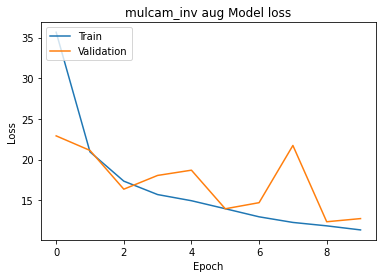

In [68]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss']) 
plt.title('mulcam_inv aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [69]:
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_invres-mul_cam_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history2=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

219055592/219055592 [==============================] - 10s 0us/step
(None, 8, 8, 1536)
(None, 8, 8, 1536)
(None, 8, 8, 1536)
(None, 228)
0 input1
1 inception_resnet_v2
2 tf.math.reduce_mean_10
3 tf.math.reduce_max_10
4 dense_32
5 dense_34
6 dense_33
7 dense_35
8 tf.__operators__.add_5
9 tf.math.sigmoid_10
10 tf.math.multiply_10
11 tf.math.reduce_mean_11
12 tf.math.reduce_max_11
13 tf.concat_5
14 conv2d_772
15 tf.math.sigmoid_11
16 tf.math.multiply_11
17 max_pooling2d_33
18 input2
19 flatten_5
20 dense_31
21 concatenate_15
22 dense_36
23 input3
24 dense_37
25 flatten_6
26 multiply_2
27 dense_38
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                   

Epoch 1/10
840/840 [==============================] - 127s 127ms/step - loss: 31.7983 - MAE: 31.7983 - val_loss: 60.8488 - val_MAE: 60.8488
Epoch 2/10
840/840 [==============================] - 104s 124ms/step - loss: 18.6809 - MAE: 18.6809 - val_loss: 23.5353 - val_MAE: 23.5353
Epoch 3/10
840/840 [==============================] - 104s 124ms/step - loss: 15.5779 - MAE: 15.5779 - val_loss: 20.1217 - val_MAE: 20.1217
Epoch 4/10
840/840 [==============================] - 101s 120ms/step - loss: 13.4007 - MAE: 13.4007 - val_loss: 32.0793 - val_MAE: 32.0793
Epoch 5/10
840/840 [==============================] - 101s 120ms/step - loss: 12.4469 - MAE: 12.4469 - val_loss: 16.2849 - val_MAE: 16.2849
Epoch 6/10
840/840 [==============================] - 101s 120ms/step - loss: 11.3644 - MAE: 11.3644 - val_loss: 19.2745 - val_MAE: 19.2745
Epoch 7/10
840/840 [==============================] - 101s 120ms/step - loss: 10.8468 - MAE: 10.8468 - val_loss: 11.6669 - val_MAE: 11.6669
Epoch 8/10
840/840 [

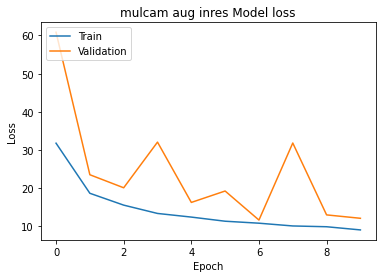

In [70]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('mulcam aug inres Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
import tensorflow as tf
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = ResNet50(weights='imagenet', include_top=False)

input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_res-mul_cam_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history3=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

94765736/94765736 [==============================] - 5s 0us/step
(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 228)
0 input1
1 resnet50
2 tf.math.reduce_mean_12
3 tf.math.reduce_max_12
4 dense_40
5 dense_42
6 dense_41
7 dense_43
8 tf.__operators__.add_6
9 tf.math.sigmoid_12
10 tf.math.multiply_12
11 tf.math.reduce_mean_13
12 tf.math.reduce_max_13
13 tf.concat_6
14 conv2d_773
15 tf.math.sigmoid_13
16 tf.math.multiply_13
17 max_pooling2d_34
18 input2
19 flatten_7
20 dense_39
21 concatenate_16
22 dense_44
23 input3
24 dense_45
25 flatten_8
26 multiply_3
27 dense_46
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                           

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
840/840 [==============================] - 42s 42ms/step - loss: 53.5805 - MAE: 53.5805 - val_loss: 54.6699 - val_MAE: 54.6699
Epoch 2/10
840/840 [==============================] - 33s 39ms/step - loss: 30.4033 - MAE: 30.4033 - val_loss: 25.4080 - val_MAE: 25.4080
Epoch 3/10
840/840 [==============================] - 33s 39ms/step - loss: 22.2961 - MAE: 22.2961 - val_loss: 20.2056 - val_MAE: 20.2056
Epoch 4/10
840/840 [==============================] - 33s 40ms/step - loss: 18.5281 - MAE: 18.5281 - val_loss: 21.2624 - val_MAE: 21.2624
Epoch 5/10
840/840 [==============================] - 33s 39ms/step - loss: 16.1069 - MAE: 16.1069 - val_loss: 21.7371 - val_MAE: 21.7371
Epoch 6/10
840/840 [==============================] - 33s 39ms/step - loss: 15.5083 - MAE: 15.5083 - val_loss: 14.4784 - val_MAE: 14.4784
Epoch 7/10
840/840 [==============================] - 33s 40ms/step - loss: 14.7234 - MAE: 14.7234 - val_loss: 30.1027 - val_MAE: 30.1027
Epoch 8/10
840/840 [==============

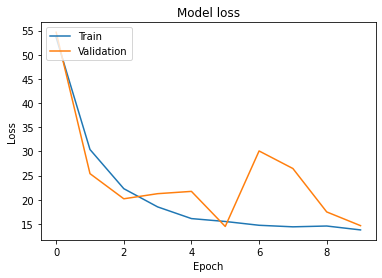

In [72]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------

In [74]:
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,1536))(sq)
sq = keras.layers.Dense(units=1536,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inres-mul_sq_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history4=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 1536)
(None, 1536)
(None, 4, 4, 1536)
(None, 1, 1, 1536)
(None, 228)
0 input1
1 inception_resnet_v2
2 global_average_pooling2d
3 reshape
4 dense_48
5 multiply_4
6 add
7 batch_normalization_970
8 activation_970
9 block_1
10 max_pooling2d_39
11 input2
12 flatten_9
13 dense_47
14 concatenate_17
15 dense_49
16 input3
17 dense_50
18 flatten_10
19 multiply_5
20 dense_51
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, None, None,   54336736   ['input1[0][0]']                 
 l)      

Epoch 1/10
840/840 [==============================] - 120s 121ms/step - loss: 121.3329 - MAE: 121.3329 - val_loss: 33.4999 - val_MAE: 33.4999
Epoch 2/10
840/840 [==============================] - 98s 117ms/step - loss: 26.7674 - MAE: 26.7674 - val_loss: 77.9004 - val_MAE: 77.9004
Epoch 3/10
840/840 [==============================] - 99s 117ms/step - loss: 17.5045 - MAE: 17.5045 - val_loss: 27.5754 - val_MAE: 27.5754
Epoch 4/10
840/840 [==============================] - 100s 119ms/step - loss: 15.1603 - MAE: 15.1603 - val_loss: 17.6544 - val_MAE: 17.6544
Epoch 5/10
840/840 [==============================] - 100s 119ms/step - loss: 13.7838 - MAE: 13.7838 - val_loss: 17.2259 - val_MAE: 17.2259
Epoch 6/10
840/840 [==============================] - 100s 119ms/step - loss: 13.0907 - MAE: 13.0907 - val_loss: 15.0688 - val_MAE: 15.0688
Epoch 7/10
840/840 [==============================] - 99s 118ms/step - loss: 12.1798 - MAE: 12.1798 - val_loss: 23.4317 - val_MAE: 23.4317
Epoch 8/10
840/840 [=

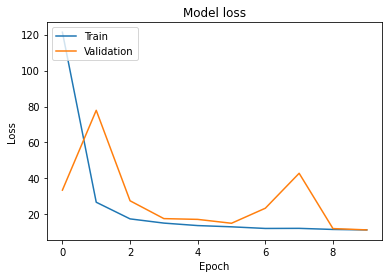

In [75]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [76]:
import tensorflow as tf
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = ResNet50(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)

sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_res-mul_sq_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history5=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 2048)
(None, 5, 5, 2048)
(None, 1, 1, 2048)
(None, 228)
0 input1
1 resnet50
2 global_average_pooling2d_1
3 reshape_1
4 dense_53
5 multiply_6
6 add_1
7 batch_normalization_971
8 activation_971
9 block_1
10 max_pooling2d_40
11 input2
12 flatten_11
13 dense_52
14 concatenate_18
15 dense_54
16 input3
17 dense_55
18 flatten_12
19 multiply_7
20 dense_56
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, None, None,   23587712    ['input1[0][0]']                 
                                

Epoch 1/10
840/840 [==============================] - 39s 39ms/step - loss: 111.2518 - MAE: 111.2518 - val_loss: 148.4811 - val_MAE: 148.4811
Epoch 2/10
840/840 [==============================] - 31s 37ms/step - loss: 22.7380 - MAE: 22.7380 - val_loss: 17.8849 - val_MAE: 17.8849
Epoch 3/10
840/840 [==============================] - 32s 38ms/step - loss: 18.5039 - MAE: 18.5039 - val_loss: 19.0266 - val_MAE: 19.0266
Epoch 4/10
840/840 [==============================] - 31s 37ms/step - loss: 16.6202 - MAE: 16.6202 - val_loss: 20.9695 - val_MAE: 20.9695
Epoch 5/10
840/840 [==============================] - 31s 36ms/step - loss: 16.2887 - MAE: 16.2887 - val_loss: 126.3040 - val_MAE: 126.3040
Epoch 6/10
840/840 [==============================] - 31s 36ms/step - loss: 16.4792 - MAE: 16.4792 - val_loss: 18.1439 - val_MAE: 18.1439
Epoch 7/10
840/840 [==============================] - 31s 36ms/step - loss: 15.3784 - MAE: 15.3784 - val_loss: 23.1405 - val_MAE: 23.1405
Epoch 8/10
840/840 [========

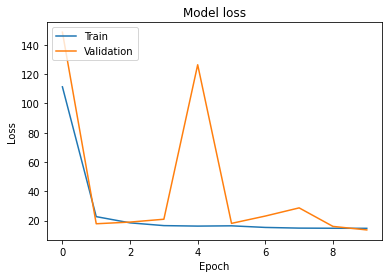

In [77]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
import tensorflow as tf
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)

sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inres-mul_sq_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history6=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
(None, 228)
0 input1
1 inception_v3
2 global_average_pooling2d_3
3 reshape_3
4 dense_59
5 multiply_8
6 add_2
7 batch_normalization_1269
8 activation_1269
9 block_1
10 max_pooling2d_49
11 input2
12 flatten_13
13 dense_58
14 concatenate_21
15 dense_60
16 input3
17 dense_61
18 flatten_14
19 multiply_9
20 dense_62
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                          

Epoch 1/10
840/840 [==============================] - 50s 51ms/step - loss: 94.4129 - MAE: 94.4129 - val_loss: 29.8716 - val_MAE: 29.8716
Epoch 2/10
840/840 [==============================] - 44s 52ms/step - loss: 32.2216 - MAE: 32.2216 - val_loss: 25.4747 - val_MAE: 25.4747
Epoch 3/10
840/840 [==============================] - 43s 51ms/step - loss: 24.9737 - MAE: 24.9737 - val_loss: 21.4570 - val_MAE: 21.4570
Epoch 4/10
840/840 [==============================] - 43s 51ms/step - loss: 21.1305 - MAE: 21.1305 - val_loss: 18.1664 - val_MAE: 18.1664
Epoch 5/10
840/840 [==============================] - 43s 51ms/step - loss: 19.4981 - MAE: 19.4981 - val_loss: 25.9727 - val_MAE: 25.9727
Epoch 6/10
840/840 [==============================] - 43s 51ms/step - loss: 17.8057 - MAE: 17.8057 - val_loss: 15.9990 - val_MAE: 15.9990
Epoch 7/10
840/840 [==============================] - 43s 51ms/step - loss: 17.0094 - MAE: 17.0094 - val_loss: 17.9008 - val_MAE: 17.9008
Epoch 8/10
840/840 [==============

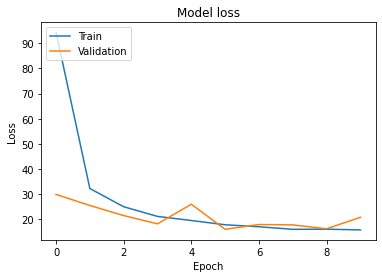

In [80]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#model to experiment on RSNA=========================================1

In [81]:
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,1536))(sq)
sq = keras.layers.Dense(units=1536,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inres-mul_sq_aug20_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=20)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history4=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=20,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 1536)
(None, 1536)
(None, 4, 4, 1536)
(None, 1, 1, 1536)
(None, 228)
0 input1
1 inception_resnet_v2
2 global_average_pooling2d_4
3 reshape_4
4 dense_64
5 multiply_10
6 add_3
7 batch_normalization_1473
8 activation_1473
9 block_1
10 max_pooling2d_54
11 input2
12 flatten_15
13 dense_63
14 concatenate_22
15 dense_65
16 input3
17 dense_66
18 flatten_16
19 multiply_11
20 dense_67
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, None, None,   54336736   ['input1[0][0]']                

Epoch 1/20
840/840 [==============================] - 118s 118ms/step - loss: 91.8732 - MAE: 91.8732 - val_loss: 70.5875 - val_MAE: 70.5875
Epoch 2/20
840/840 [==============================] - 96s 114ms/step - loss: 25.2215 - MAE: 25.2215 - val_loss: 21.7448 - val_MAE: 21.7448
Epoch 3/20
840/840 [==============================] - 98s 116ms/step - loss: 17.4199 - MAE: 17.4199 - val_loss: 33.8633 - val_MAE: 33.8633
Epoch 4/20
840/840 [==============================] - 101s 120ms/step - loss: 13.9054 - MAE: 13.9054 - val_loss: 28.9600 - val_MAE: 28.9600
Epoch 5/20
840/840 [==============================] - 102s 122ms/step - loss: 13.3491 - MAE: 13.3491 - val_loss: 16.8387 - val_MAE: 16.8387
Epoch 6/20
840/840 [==============================] - 101s 121ms/step - loss: 12.3809 - MAE: 12.3809 - val_loss: 22.6816 - val_MAE: 22.6816
Epoch 7/20
840/840 [==============================] - 99s 118ms/step - loss: 11.2756 - MAE: 11.2756 - val_loss: 14.9913 - val_MAE: 14.9913
Epoch 8/20
840/840 [===

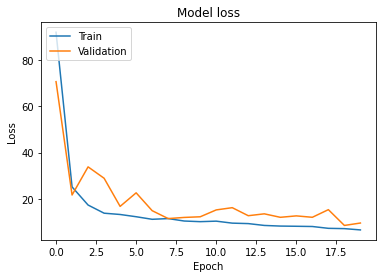

In [82]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#=====================================================================================

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [83]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
#x=spatial_attention(x)
#print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_ch_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history1=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])
     

(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 228)
0 input1
1 inception_v3
2 tf.math.reduce_mean_14
3 tf.math.reduce_max_14
4 dense_69
5 dense_71
6 dense_70
7 dense_72
8 tf.__operators__.add_7
9 tf.math.sigmoid_14
10 tf.math.multiply_14
11 max_pooling2d_59
12 input2
13 flatten_17
14 dense_68
15 concatenate_25
16 dense_73
17 input3
18 dense_74
19 flatten_18
20 multiply_12
21 dense_75
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
840/840 [==============================] - 51s 52ms/step - loss: 37.2567 - MAE: 37.2567 - val_loss: 27.8551 - val_MAE: 27.8551
Epoch 2/10
840/840 [==============================] - 42s 50ms/step - loss: 19.8397 - MAE: 19.8397 - val_loss: 21.8328 - val_MAE: 21.8328
Epoch 3/10
840/840 [==============================] - 42s 50ms/step - loss: 16.7620 - MAE: 16.7620 - val_loss: 17.9354 - val_MAE: 17.9354
Epoch 4/10
840/840 [==============================] - 42s 50ms/step - loss: 14.6006 - MAE: 14.6006 - val_loss: 14.9029 - val_MAE: 14.9029
Epoch 5/10
840/840 [==============================] - 42s 50ms/step - loss: 13.8739 - MAE: 13.8739 - val_loss: 13.8142 - val_MAE: 13.8142
Epoch 6/10
840/840 [==============================] - 42s 50ms/step - loss: 12.6798 - MAE: 12.6798 - val_loss: 14.5166 - val_MAE: 14.5166
Epoch 7/10
840/840 [==============================] - 42s 50ms/step - loss: 12.2920 - MAE: 12.2920 - val_loss: 15.8894 - val_MAE: 15.8894
Epoch 8/10
840/840 [==============

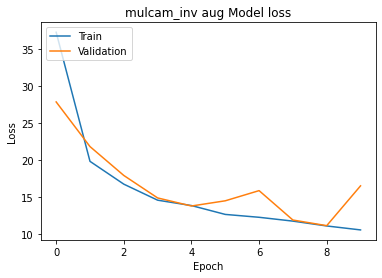

In [84]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss']) 
plt.title('mulcam_inv aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [85]:
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
#print (K.int_shape(x))
#x=spatial_attention(x)
#print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_invres-mul_ch_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history2=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 1536)
(None, 228)
0 input1
1 inception_resnet_v2
2 tf.math.reduce_mean_15
3 tf.math.reduce_max_15
4 dense_77
5 dense_79
6 dense_78
7 dense_80
8 tf.__operators__.add_8
9 tf.math.sigmoid_15
10 tf.math.multiply_15
11 max_pooling2d_64
12 input2
13 flatten_19
14 dense_76
15 concatenate_26
16 dense_81
17 input3
18 dense_82
19 flatten_20
20 multiply_13
21 dense_83
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, None, None,   54336736   ['input1[0][0]']                 
 l)             

Epoch 1/10
840/840 [==============================] - 124s 124ms/step - loss: 37.4805 - MAE: 37.4805 - val_loss: 1956.7668 - val_MAE: 1956.7668
Epoch 2/10
840/840 [==============================] - 98s 117ms/step - loss: 17.8476 - MAE: 17.8476 - val_loss: 138.4514 - val_MAE: 138.4514
Epoch 3/10
840/840 [==============================] - 101s 120ms/step - loss: 14.7037 - MAE: 14.7037 - val_loss: 577.7880 - val_MAE: 577.7880
Epoch 4/10
840/840 [==============================] - 101s 121ms/step - loss: 12.3078 - MAE: 12.3078 - val_loss: 93.2023 - val_MAE: 93.2023
Epoch 5/10
840/840 [==============================] - 101s 120ms/step - loss: 11.4208 - MAE: 11.4208 - val_loss: 95.4925 - val_MAE: 95.4925
Epoch 6/10
840/840 [==============================] - 100s 119ms/step - loss: 10.4482 - MAE: 10.4482 - val_loss: 677.0591 - val_MAE: 677.0591
Epoch 7/10
840/840 [==============================] - 100s 119ms/step - loss: 9.8747 - MAE: 9.8747 - val_loss: 50.4235 - val_MAE: 50.4235
Epoch 8/10
84

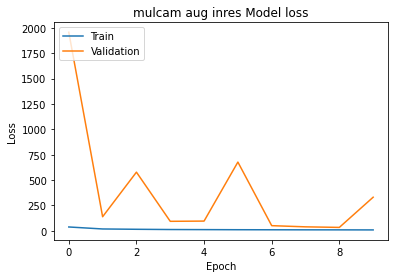

In [86]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('mulcam aug inres Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [87]:
import tensorflow as tf
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = ResNet50(weights='imagenet', include_top=False)

input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
#print (K.int_shape(x))
#x=spatial_attention(x)
#print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_res-mul_ch_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history3=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=10,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 10, 10, 2048)
(None, 228)
0 input1
1 resnet50
2 tf.math.reduce_mean_16
3 tf.math.reduce_max_16
4 dense_85
5 dense_87
6 dense_86
7 dense_88
8 tf.__operators__.add_9
9 tf.math.sigmoid_16
10 tf.math.multiply_16
11 max_pooling2d_65
12 input2
13 flatten_21
14 dense_84
15 concatenate_27
16 dense_89
17 input3
18 dense_90
19 flatten_22
20 multiply_14
21 dense_91
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, None, None,   23587712    ['input1[0][0]']                 
                        

Epoch 1/10
840/840 [==============================] - 40s 41ms/step - loss: 53.2961 - MAE: 53.2961 - val_loss: 50.7739 - val_MAE: 50.7739
Epoch 2/10
840/840 [==============================] - 33s 39ms/step - loss: 19.7858 - MAE: 19.7858 - val_loss: 19.9620 - val_MAE: 19.9620
Epoch 3/10
840/840 [==============================] - 33s 39ms/step - loss: 17.1527 - MAE: 17.1527 - val_loss: 16.6624 - val_MAE: 16.6624
Epoch 4/10
840/840 [==============================] - 33s 39ms/step - loss: 15.4013 - MAE: 15.4013 - val_loss: 22.9924 - val_MAE: 22.9924
Epoch 5/10
840/840 [==============================] - 33s 39ms/step - loss: 14.5363 - MAE: 14.5363 - val_loss: 18.5528 - val_MAE: 18.5528
Epoch 6/10
840/840 [==============================] - 32s 39ms/step - loss: 13.4653 - MAE: 13.4653 - val_loss: 18.4762 - val_MAE: 18.4762
Epoch 7/10
840/840 [==============================] - 33s 40ms/step - loss: 12.7013 - MAE: 12.7013 - val_loss: 18.6331 - val_MAE: 18.6331
Epoch 8/10
840/840 [==============

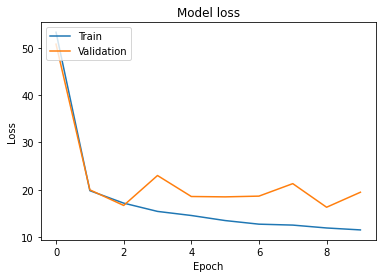

In [88]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#MOdel to experiment to RSna ===========================================2

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
#x=spatial_attention(x)
#print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_ch_aug_ndimg20.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=20)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history1=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=20,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])
     

(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 228)
0 input1
1 inception_v3
2 tf.math.reduce_mean_17
3 tf.math.reduce_max_17
4 dense_93
5 dense_95
6 dense_94
7 dense_96
8 tf.__operators__.add_10
9 tf.math.sigmoid_17
10 tf.math.multiply_17
11 max_pooling2d_70
12 input2
13 flatten_23
14 dense_92
15 concatenate_30
16 dense_97
17 input3
18 dense_98
19 flatten_24
20 multiply_15
21 dense_99
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
  

Epoch 1/20
840/840 [==============================] - 53s 54ms/step - loss: 39.1740 - MAE: 39.1740 - val_loss: 21.6757 - val_MAE: 21.6757
Epoch 2/20
840/840 [==============================] - 43s 51ms/step - loss: 20.2274 - MAE: 20.2274 - val_loss: 15.5431 - val_MAE: 15.5431
Epoch 3/20
840/840 [==============================] - 43s 51ms/step - loss: 16.4178 - MAE: 16.4178 - val_loss: 17.7789 - val_MAE: 17.7789
Epoch 4/20
840/840 [==============================] - 45s 53ms/step - loss: 15.2757 - MAE: 15.2757 - val_loss: 14.3333 - val_MAE: 14.3333
Epoch 5/20
840/840 [==============================] - 45s 54ms/step - loss: 13.7683 - MAE: 13.7683 - val_loss: 13.9659 - val_MAE: 13.9659
Epoch 6/20
840/840 [==============================] - 45s 54ms/step - loss: 13.3896 - MAE: 13.3896 - val_loss: 13.2844 - val_MAE: 13.2844
Epoch 7/20
840/840 [==============================] - 45s 54ms/step - loss: 12.8466 - MAE: 12.8466 - val_loss: 18.7166 - val_MAE: 18.7166
Epoch 8/20
840/840 [==============

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#===============================================================================

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------